
# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


In [4]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [5]:
print(df.describe())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


<h3>1. Is the distribution of body temperature normal? </h3>
<p>Comparing the theoretical and the actual ecdf of the human body temperature the data does come close to a normal distribution</p>


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


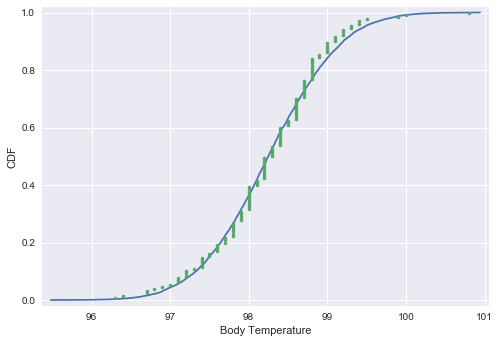

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y 

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean,std,size=10000)
x,y=ecdf(df['temperature'])
x_theor,y_theor=ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()



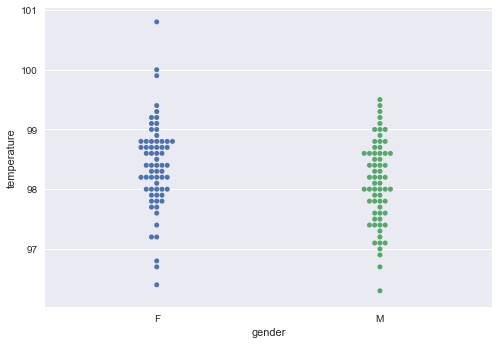

In [23]:
#Additonal data exploration
import seaborn as sns
sns.set()
_ = sns.swarmplot(df['gender'],df['temperature'])
plt.show()


<h3>2. Is the sample large? Are the observations independent? </h3>
<p>Since the sample size is larger than 30 it is adequate to test hypothesis. 
Given the almost 0 correlation between the Male and Female temperatures and fitting a poorly scored linear regression through it, shows that the data is not correlated. </p>

Correlation coefficient between temperatures of the two genders: -0.0396448615892


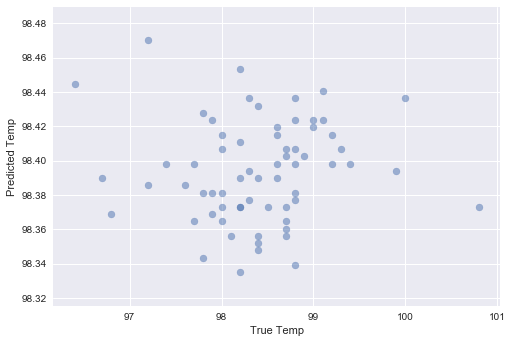

Linear Regression Score:  0.00157171505042


In [72]:
print("Correlation coefficient between temperatures of the two genders:" , np.corrcoef(df['temperature'][df['gender']=='M'],df['temperature'][df['gender']=='F'])[0,1]) 

import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set
x= pd.DataFrame(df['temperature'][df['gender']=='M'])
y= pd.DataFrame(df['temperature'][df['gender']=='F'])
lm2 = LinearRegression()
lm2.fit(x,y)
plt.scatter(y,lm2.predict(x),alpha = 0.5)
plt.xlabel('True Temp')
plt.ylabel('Predicted Temp')
plt.show()
print("Linear Regression Score: ",lm2.score(x,y))




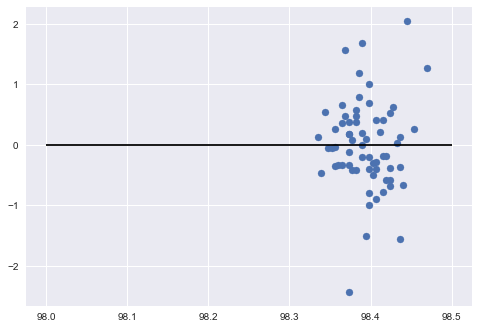

Linear Regression Score:  0.00157171505042


In [65]:
#2.2
plt.scatter(lm2.predict(x), lm2.predict(x) - y)
plt.hlines(y=0,xmin=98,xmax=98.5)
plt.show()
print("Linear Regression Score: ", lm2.score(x,y))

<h3>3. Is the true population mean really 98.6 degrees F</h3>
<p>True mean is the temperature we would have gotten had we done the experiment lots and lots of times. 
However since we are comparing to a value, permutation test is not applicable.
We need to shift the data so that the mean is now the "true mean"</p>
<p>new_temp = temperature - np.mean(temperature) + "true mean"</p>

<p>Now we can use bootstrapping on this new data set to simulate data collection under the null hypothesis. </p>
<p>This is a one sample test if we shift and bootstrap one data. 
Since sample size is greater than 30 we can assume normal distribution and use the z statistic critical value at 5% significance level and calculate Z.</p>
<p>The small p-value obtained in the test leads us to reject the null hypothesis that the mean body temperature is 98.6 degree F </p>

In [130]:
#Reject null hypothesis if Z <= -1.645
pop_mean = 98.6
sample_std = np.std(df['temperature'])
sample_mean = np.mean(df['temperature'])
sample_size = len(df['temperature'])
test_statistic = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))
print("Z score: ", Z)

#null hypothesis: the true population mean is 98.6 degrees
def diff_from_true_mean(data,true_mean = 98.6):
    return np.mean(data) - true_mean

def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data,len(data)))

def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates        
           
true_mean = 98.6
sample_mean = np.mean(df['temperature'])
temperature_shifted = df['temperature'] - sample_mean + true_mean
diff_obs = sample_mean - true_mean
bs_replicates = draw_bs_reps(temperature_shifted,diff_from_true_mean,100000)
p_value = np.sum(bs_replicates <=diff_obs)/100000
print(p_value)

0.7303577789050377
Z score:  -5.47592520208
0.0


<h3> 4. Draw a small sample of size 10 from the data and repeat both tests. </h3>
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
    
<h3> Solution: </h3>
<p>Since the sample size is much smaller now and we do not know the population standard deviation we should use the T test. At 5% significance level the t critical value for a two tailed test is 2.26. Therefore we can reject the null hypothesis that the true population mean is 98.6 degrees if the T statistic is < -2.26 or > 2.26 </p>
<p> It looks like the T critical value for rejecting the null hypothesis is more strict and therefore the null hypothesis that was easily rejected in the previous step, is more difficult to reject now</p>
    

In [138]:
sample_10 = np.random.choice(df['temperature'], size=10)
print(sample_10)
sample_10_mean = np.mean(sample_10)
sample_10_std = np.std(sample_10)
degrees_freedom = len(sample_10) -1
t_critical = stats.t.ppf(1-0.025,9)
print("T critical :",t_critical)
Z_critical = stats.norm.ppf(q=0.975)
print("Z critical: ", Z_critical)
print("T statistic :",(sample_10_mean-98.6)/ (sample_10_std/np.sqrt(10)))


[ 98.   96.3  99.   98.   98.7  98.7  98.3  97.8  98.   98.6]
T critical : 2.26215716274
Z critical:  1.95996398454
T statistic : -2.0242526425


<h3>5. At what temperature should we consider someone's temperature to be "abnormal"?</h3>
<p>Start by computing the margin of error and confidence interval. Draw bootstrap samples, and create bootstrap replicates of mean then calculate the confidence interval.</p>

In [9]:

from scipy import stats

bs_replicates = draw_bs_reps(df['temperature'],np.mean,10000)
print(np.percentile(bs_replicates,[2.5,97.5]))

sem = np.std(df['temperature'])/np.sqrt(len(df['temperature']))
print("Standard error of the mean:",sem)
z_critical = stats.norm.ppf(q = 0.975)
margin_of_error = z_critical*sem
print("Margin of error:",margin_of_error)
confidence_interval = [np.mean(bs_replicates) - margin_of_error, np.mean(bs_replicates) + margin_of_error]
print("Recalculated confidence interval:",confidence_interval)

[ 98.12230769  98.37461538]
Standard error of the mean: 0.0640566146952
Margin of error: 0.125548657774
Recalculated confidence interval: [98.123492111456642, 98.374589427004906]


In [10]:
np.mean(np.random.choice(df['temperature'],len(df['temperature'])))

98.187692307692302

<h3>6.Is there a significant difference between males and females in normal temperature?</h3>
<p>What test did you use and why?
Write a story with your conclusion in the context of the original problem.</p>

<h3>Solution:</h3>
<p>Since sample size n >= 30 we can perform test the Z statistic to determine if there is a significant difference between the body temperatures of the two genders</p>

<h4>Step 1:</h4>
<p>H0: u1 = u2</p>
<p>H1: u1 != u2 .  a = 0.05(significance level)</p>

<h4>Step 2: </h4>
<p>Since sample size is > = 30 we can use Z test statistic. </p>
<p>The ratio of the sample variances of the two genders is 0.88 which implies that the assumption of equality of the population variances is reasonable. </p>

<p>The appropriate test statistic is z = (x1 - x2)/s x ((1/n1 + 1/n2)^(1/2))</p>

<h4>Step 3: Decision rule</h4>
<p>This is a two-tailed test at 5% significance level and therefore we will reject the null hypothesis if
Z<= -1.960 or Z >= 1.960</p>

In [75]:

diff_obs = np.mean(df['temperature'][df['gender']=='M']) - np.mean(df['temperature'][df['gender']=='F'])
Sp_num = 64*(np.var(df['temperature'][df['gender']=='M'])) + 64*np.var(df['temperature'][df['gender']=='F'])
Sp_den = 128
Sp = np.sqrt(Sp_num/Sp_den)
Z = diff_obs/(Sp * np.sqrt(1/64 + 1/64))
print(Z)

print(diff_obs)
perm_reps = np.empty(100000)

for i in range(100000):
    new_df = np.random.permutation(df['temperature'])
    new_male = new_df[:len(new_df)//2]
    new_female = new_df[len(new_df)//2:]
    perm_reps[i] = np.mean(new_male) - np.mean(new_female)

p_value = np.sum(perm_reps <=diff_obs)/100000
print(p_value)



-2.28543453817
-0.289230769230727
0.01233


In [44]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set
x= pd.DataFrame(df['temperature'][df['gender']=='M'])
y= pd.DataFrame(df['temperature'][df['gender']=='F'])
lm2 = LinearRegression()
lm2.fit(x,y)
plt.scatter(y,lm2.predict(x),alpha = 0.5)
plt.xlabel('True Temp')
plt.ylabel('Predicted Temp')

print("Mean Squared error:" , np.mean((y - lm2.predict(x))**2))


Mean Squared error: temperature    0.543414
dtype: float64
temperature    1.967657e-14
dtype: float64
